In [82]:
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
df_ = pd.read_csv("/content/live_model_credit.csv")
# filtering the data
df_.isna().sum()

df_.dropna(inplace=True,axis =0)
df_

,CreditScore,Gender,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary,Exited
0,557,Female,42,2,0.00,101348.88,1
1,719,Female,41,1,83807.86,112542.58,0
2,763,Female,42,8,159660.80,113931.57,1
3,517,Female,39,1,0.00,93826.63,0
4,771,Female,43,2,125510.82,79084.10,0
...,...,...,...,...,...,...,...
9995,562,Male,39,5,0.00,96270.64,0
9996,565,Male,35,10,57369.61,101699.77,0
9997,583,Female,36,7,0.00,42085.58,1
9998,540,Male,42,3,75075.31,92888.52,1


In [84]:
# defining the independent and dependent variable
x_var = df_.iloc[:,0:6].values
y_var = df_["Exited"].values
x_var.shape


(10000, 6)

In [85]:
# assigning the numeric value for the gender by using the label encoding
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose  import ColumnTransformer
df_numeric = ColumnTransformer([("Gender",OneHotEncoder(),[1])],remainder="passthrough")
x_var = df_numeric.fit_transform(x_var)
x_var

array([[1.0, 0.0, 557, ..., 2, 0.0, 101348.88],
       [1.0, 0.0, 719, ..., 1, 83807.86, 112542.58],
       [1.0, 0.0, 763, ..., 8, 159660.8, 113931.57],
       ...,
       [1.0, 0.0, 583, ..., 7, 0.0, 42085.58],
       [0.0, 1.0, 540, ..., 3, 75075.31, 92888.52],
       [1.0, 0.0, 802, ..., 4, 130142.79, 38190.78]], dtype=object)

In [86]:
x_var_df = pd.DataFrame(x_var, columns = ["x1","x2", "Credit Rating","Age", "Tenure (Yrs)", "Outstanding Amt", "EstimatedSalary"]
)
x_var_df.drop("x2",axis=1,inplace=True)
x_var_df


,x1,Credit Rating,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary
0,1.0,557,42,2,0.0,101348.88
1,1.0,719,41,1,83807.86,112542.58
2,1.0,763,42,8,159660.8,113931.57
3,1.0,517,39,1,0.0,93826.63
4,1.0,771,43,2,125510.82,79084.1
...,...,...,...,...,...,...
9995,0.0,562,39,5,0.0,96270.64
9996,0.0,565,35,10,57369.61,101699.77
9997,1.0,583,36,7,0.0,42085.58
9998,0.0,540,42,3,75075.31,92888.52


## note here we can also use the labelencoding

In [87]:
# spiliting the training and testing data
from sklearn.model_selection import train_test_split
# spliting the data from 20% and taking the random state 0 for simplicity
x_train, x_test,y_train,y_test = train_test_split(x_var_df,y_var,test_size =0.2,random_state=1)


In [88]:
# Standardize the train and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
# as  we know usin the tarined data mean and variance
x_test = sc.transform(x_test)

In [89]:

# statistical tools
import statsmodels.api as sm
# the model drop the constant so for validty of the markov property
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# logistic regression
classifier = sm.Logit(y_train, x_train)
model = classifier.fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.455972
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Tue, 07 May 2024   Pseudo R-squ.:                 0.09564
Time:                        16:16:56   Log-Likelihood:                -3647.8
converged:                       True   LL-Null:                       -4033.5
Covariance Type:            nonrobust   LLR p-value:                2.209e-163
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5329      0.032    -48.599      0.000      -1.595      -1.471
x1             0.2725      0.029      9.277      0.000       0.215       0.330
x2             0.0202      0.029      0.685      0.493      -0.038       0.078
x3             0.6468      0.028     23.075      0.000       0.592       0.702
x4            -0.0088      0.029     -0.302      0.762      -0.066       0.048
x5             0.3160      0.030     10.393      0.000       0.256       0.376
x6             0.0233      0.029      0.791      0.429      -0.034       0.081
==============================================================================
"""

accuracy 0.7875


<Axes: >

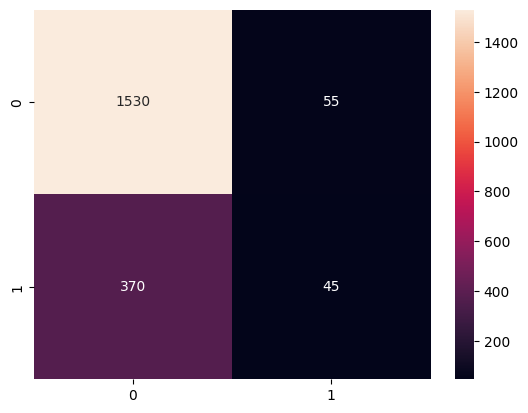

In [90]:
import seaborn as sns
from sklearn import metrics
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
print("accuracy", metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="")

In [94]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
for i in np.arange(0,1,0.05):
  y_pred = model.predict(x_test)
  y_pred = (y_pred> i)
  accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
  precision_list.append(metrics.precision_score(y_test,y_pred))
  recall_list.append(metrics.recall_score(y_test,y_pred))
  f1_list.append(metrics.f1_score(y_test,y_pred))
  print(i)
  print("accuracy", metrics.accuracy_score(y_test,y_pred))
  print("precision", metrics.precision_score(y_test, y_pred))
  print("recall", metrics.recall_score(y_test, y_pred))
  print("f1", metrics.f1_score(y_test, y_pred))
  print("******")

0.0
accuracy 0.2075
precision 0.2075
recall 1.0
f1 0.3436853002070393
******
0.05
accuracy 0.222
precision 0.21055301877219684
recall 1.0
f1 0.34786253143336127
******
0.1
accuracy 0.387
precision 0.2476664592408214
recall 0.9590361445783132
f1 0.3936696340257171
******
0.15000000000000002
accuracy 0.5855
precision 0.3148479427549195
recall 0.8481927710843373
f1 0.45923026744944556
******
0.2
accuracy 0.705
precision 0.3868046571798189
recall 0.7204819277108434
f1 0.5033670033670034
******
0.25
accuracy 0.7535
precision 0.4247104247104247
recall 0.5301204819277109
f1 0.4715969989281887
******
0.30000000000000004
accuracy 0.782
precision 0.4712328767123288
recall 0.41445783132530123
f1 0.44102564102564107
******
0.35000000000000003
accuracy 0.788
precision 0.48221343873517786
recall 0.29397590361445786
f1 0.36526946107784425
******
0.4
accuracy 0.789
precision 0.48044692737430167
recall 0.20722891566265061
f1 0.2895622895622896
******
0.45
accuracy 0.787
precision 0.45925925925925926
re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

accuracy 0.782


<Axes: >

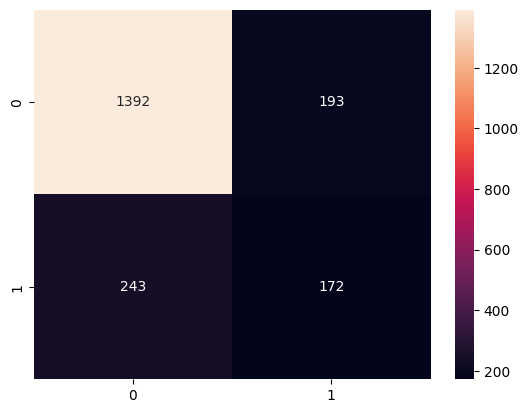

In [95]:

y_pred = model.predict(x_test)
y_pred = (y_pred>0.3)
print("accuracy", metrics.accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="")

In [96]:
thresholds = np.arange(0, 1, 0.05)
df_metrics = pd.DataFrame({
    'Threshold': thresholds,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list
})

df_metrics

,Threshold,Accuracy,Precision,Recall,F1
0,0.00,0.2075,0.207500,1.000000,0.343685
1,0.05,0.2220,0.210553,1.000000,0.347863
2,0.10,0.3870,0.247666,0.959036,0.393670
3,0.15,0.5855,0.314848,0.848193,0.459230
4,0.20,0.7050,0.386805,0.720482,0.503367
5,0.25,0.7535,0.424710,0.530120,0.471597
6,0.30,0.7820,0.471233,0.414458,0.441026
7,0.35,0.7880,0.482213,0.293976,0.365269
8,0.40,0.7890,0.480447,0.207229,0.289562
9,0.45,0.7870,0.459259,0.149398,0.225455


NameError: name 'plt' is not defined

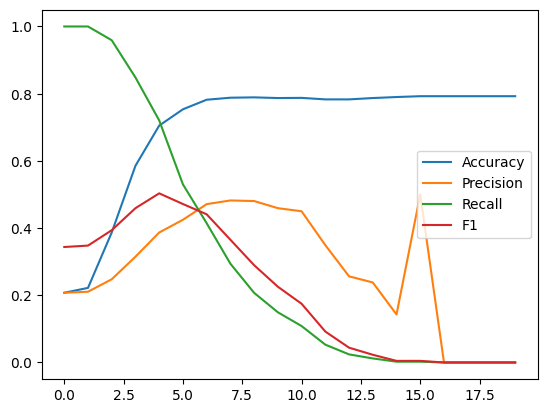

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_metrics.drop(columns='Threshold'), dashes=False)

plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.grid(True)
plt.show()